In [1]:
#Dependencies 
import hashlib
import re
import matplotlib.pyplot as plt

# Proof of Work:
## All the Pending Transactions would be taken and converted into a Merkle Tree Data Structure 



In [54]:
def get_merkel_root(list_of_transaction):
    hash_alg = hashlib.sha256()
    combined_trans_enc = ''.encode()
    for transaction in list_of_transaction:
        trans_enc = transaction.encode()
        combined_trans_enc += trans_enc
    hash_alg.update(combined_trans_enc)
    root_hash = hash_alg.hexdigest()
    return(root_hash)
    

In [61]:
list_of_transactions = ['<ashu><mark><2BTC><13568384>'
                       ,'<ashu><mike><6BTC><13568562>'
                       ,'<mike><mark><7BTC><13568384>'
                       ,'<john><mike><2BTC><13568562>'
                       ,'<john><ashu><4BTC><13568384>'
                       ,'<ashu><mike><2.6BTC><13568562>']
get_merkel_root(list_of_transaction=list_of_transactions)

'c2197af3dc42440e009444d48061177d62138f9cf46a5d8652d0f46c53398aa3'

## Hash of the Merkle Tree would be Broadcasted to all "nodes" or "miners"
## The Miners would then append a "nonce" to Hash of the Merkle Tree and Hash it again.
## Repeat this process with a new "nonce" till they hit the Validation Output

In [57]:

"""
Function to calculate a "nonce" for any given "RootHashKey"
which can be verified that the output starts with a 
X number of zeroes determined by the difficulty set by the
smart contract  
"""
def get_nonce(msg=get_merkel_root(list_of_transaction=list_of_transactions)
              , difficulty = 4):
    hash_found = False
    nonce = 0
    msg = msg
    target = difficulty*'0'
    target = '^'+target+'+'
    while not(hash_found):
        nonce=nonce+1
        root_hash = hashlib.sha256()
        byte_msg = msg.encode()
        secretKey = str(nonce).encode()
        root_hash.update(byte_msg + secretKey)
        verification_hash = root_hash.hexdigest()
        if(re.match(target, verification_hash)):
            hash_found =True
            print(verification_hash)
    return(nonce)

0093e3287df08cfe60e46fe5e825e84dbca10fc4c56aa2818ec4a4379ddf63be
000529d49a9a42ba919928fcc7f1e7681384d2ad4b5e5e63d13ed41898af8305
000006a1ccac6f62e60746b9e7008bfe64c22d4e33e3d4fe3c79741d812cc131
000006a1ccac6f62e60746b9e7008bfe64c22d4e33e3d4fe3c79741d812cc131


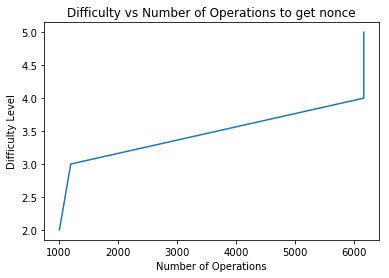

In [58]:
nounce_range=[]
for difficulty in range(2,6):
    nounce_range.append(get_nonce(difficulty=difficulty))
plt.plot(nounce_range,[2,3,4,5])
plt.xlabel("Number of Operations")
plt.ylabel("Difficulty Level")
plt.title("Difficulty vs Number of Operations to get nonce")
plt.show()

In [62]:
get_nonce(msg=get_merkel_root(list_of_transaction=list_of_transactions)
          ,difficulty=4)

0000bdf76e4db7aa69905288e7c46baddb483509c0a7a43e7a5c83d0d549c816


24120

In [64]:
def verify_nonce(nonce
                 , msg='RootHashKey'
                 ,difficulty = 4):
    hash_found = False
    target = difficulty*'0'
    target = '^'+target+'*'
    root_hash = hashlib.sha256()
    byte_msg = msg.encode()
    secretKey = str(nonce).encode()
    root_hash.update(byte_msg + secretKey)
    verification_hash = root_hash.hexdigest()
    if(re.match(target, verification_hash)):
        print("Nonce Verified, now this Block can be added")
        print(verification_hash)
    else:
        print("Nonce isn't acceptable")

In [65]:
verify_nonce(nonce=8407
             ,msg=get_merkel_root(list_of_transaction=list_of_transactions)
             ,difficulty=4)

Nonce isn't acceptable
